In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
HD_data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
HD_data = HD_data.astype(int)
HD_data['Diabetes'] = np.where(HD_data['Diabetes'].isin([1, 2]), 1, HD_data['Diabetes'])



# Combine columns
HD_data['Combined'] = HD_data[['Stroke', 'HeartDiseaseorAttack', 'Diabetes']].astype(str).agg('_'.join, axis=1)

# Viewing the tail of DataFrame
print(HD_data.tail())

# Printing column names
print(HD_data.columns)

# Creating factors
HD_data['HighBP'] = HD_data['HighBP'].map({0: 'No', 1: 'Yes'})
HD_data['HighChol'] = HD_data['HighChol'].map({0: 'No', 1: 'Yes'})
HD_data['CholCheck'] = HD_data['CholCheck'].map({0: 'No', 1: 'Yes'})
HD_data['Smoker'] = HD_data['Smoker'].map({0: 'No', 1: 'Yes'})
HD_data['PhysActivity'] = HD_data['PhysActivity'].map({0: 'No', 1: 'Yes'})
HD_data['Fruits'] = HD_data['Fruits'].map({0: 'No', 1: 'Yes'})
HD_data['Veggies'] = HD_data['Veggies'].map({0: 'No', 1: 'Yes'})
HD_data['HvyAlcoholConsump'] = HD_data['HvyAlcoholConsump'].map({0: 'No', 1: 'Yes'})
HD_data['AnyHealthcare'] = HD_data['AnyHealthcare'].map({0: 'No', 1: 'Yes'})
HD_data['NoDocbcCost'] = HD_data['NoDocbcCost'].map({0: 'No', 1: 'Yes'})
HD_data['DiffWalk'] = HD_data['DiffWalk'].map({0: 'No', 1: 'Yes'})
HD_data['Sex'] = HD_data['Sex'].map({0: 'Male', 1: 'Female'})

# Create contingency tables
def create_contingency_table(df, category):
    contingency_table = df.groupby('Combined')[category].value_counts().unstack().fillna(0)
    total = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total, axis=0) * 100).add_prefix(f"{category}_percentage_")
    percentages = percentages.round(2)
    percentages = percentages.astype(str) + "%"
    return pd.concat([contingency_table, percentages, total.rename('Total')], axis=1)

# Generate all contingency tables
categories = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
tables = {cat: create_contingency_table(HD_data, cat) for cat in categories}



        HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  \
253675                     0       1         1          1   45       0   
253676                     0       1         1          1   18       0   
253677                     0       0         0          1   28       0   
253678                     0       1         0          1   23       0   
253679                     1       1         1          1   25       0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
253675       0         0             0       1  ...            0        3   
253676       0         1             0       0  ...            0        4   
253677       0         0             1       1  ...            0        1   
253678       0         0             0       1  ...            0        3   
253679       0         1             1       1  ...            0        2   

        MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  Combined  
253675        

In [2]:
#Age division -> 3 groups = 18 - 35: Young Adult -> 36 - 65: Adult -> 65+ Senior

In [3]:
# Create dropdown widget

import pandas as pd
import numpy as np
import ipywidgets as widgets  # Import widgets module from ipywidgets
from IPython.display import display

# Now you can proceed with defining your dropdown widget and other interactive elements

category_dropdown = widgets.Dropdown(
    options=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
             'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
    description='Select Variable:',
    disabled=False
)

# Define function to update output
def update_output(category):
    table = create_contingency_table(HD_data, category)
    display(table)

# Create an interactive widget and display the dropdown
widgets.interactive(update_output, category=category_dropdown)

interactive(children=(Dropdown(description='Select Variable:', options=('HighBP', 'HighChol', 'CholCheck', 'Sm…

In [4]:
print(max(HD_data["BMI"]))
print(min(HD_data["BMI"]))
'''
According to CHATGPT:

Underweight: BMI less than 18.5
Normal weight: BMI 18.5 to 24.9
Overweight: BMI 25 to 29.9
Obesity: BMI 30 or greater
'''

#HD_data["BMI"]

#import pandas as pd


# Define the bins and labels for BMI categories
bins = [0, 19, 25, 30, float('inf')]  # BMI category boundaries
labels = ['Underweight', 'Normalweight', 'Overweight', 'Obesity']  # BMI category labels

# Divide BMI values into categories
HD_data['BMI_category'] = pd.cut(HD_data['BMI'], bins=bins, labels=labels, right=False)

#print(HD_data)






98
12


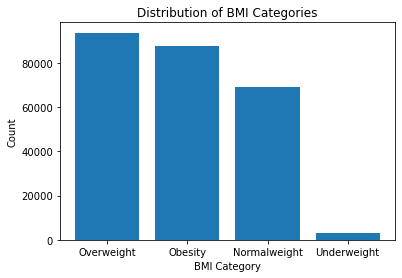

In [5]:
import matplotlib.pyplot as plt
category_counts = HD_data["BMI_category"].value_counts()

# Plot the distribution of BMI categories
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories')
plt.show()



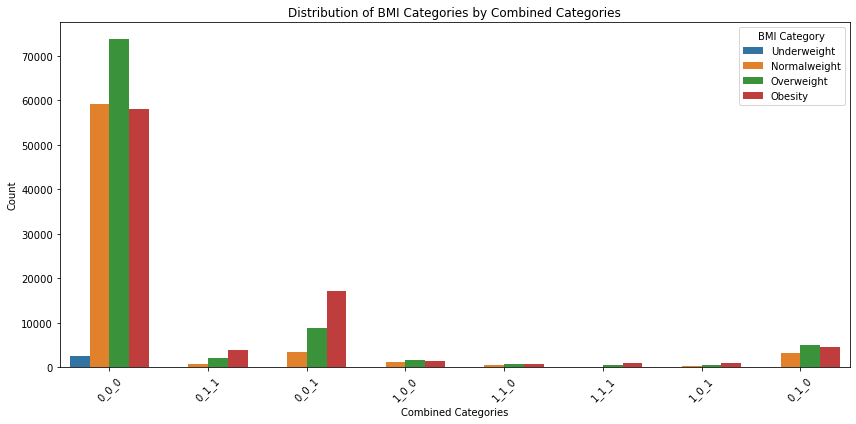

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='BMI_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories by Combined Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='BMI Category')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [7]:
#print(max(HD_data["MentHlth"]))
#print(min(HD_data["MentHlth"]))


"""
Will divide into 3 groups
Low Mental Health: 0 - 10 
Mid Mental Health: 11 - 20
High Mental Health: 21 - 30 
"""

bins = [0, 10, 20, float('inf')]  
labels = ['Low Mental Health', 'Mid Mental Health', 'High Mental Health']  


HD_data['MentHlth_category'] = pd.cut(HD_data['MentHlth'], bins=bins, labels=labels, right=False)

print(HD_data['MentHlth_category'])



0          Mid Mental Health
1          Low Mental Health
2         High Mental Health
3          Low Mental Health
4          Low Mental Health
                 ...        
253675     Low Mental Health
253676     Low Mental Health
253677     Low Mental Health
253678     Low Mental Health
253679     Low Mental Health
Name: MentHlth_category, Length: 253680, dtype: category
Categories (3, object): ['Low Mental Health' < 'Mid Mental Health' < 'High Mental Health']


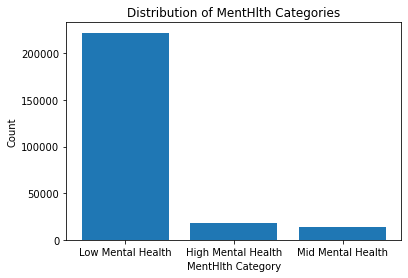

In [8]:

category_counts = HD_data["MentHlth_category"].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('MentHlth Category')
plt.ylabel('Count')
plt.title('Distribution of MentHlth Categories')
plt.show()

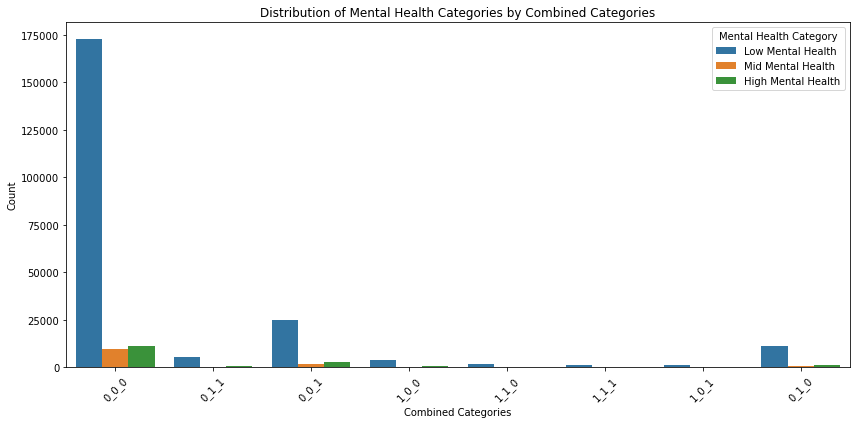

In [9]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='MentHlth_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Mental Health Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Mental Health Category')
plt.tight_layout() 
plt.show()

In [10]:

print(max(HD_data["Age"]))
print(min(HD_data["Age"]))

'''


Age division -> 3 groups 
Young Adult: 18 - 35 : 1 - 4
Adult -> 36 - 65: 5 - 9
Elder -> 65+:  10 - 13

'''

bins = [1, 5, 10, float('inf')]  
labels = ['Young Adult', 'Adult', 'Elder']  


HD_data['Age_category'] = pd.cut(HD_data['Age'], bins=bins, labels=labels, right=False)

print(HD_data['Age_category'])




13
1
0               Adult
1               Adult
2               Adult
3               Elder
4               Elder
             ...     
253675          Adult
253676          Elder
253677    Young Adult
253678          Adult
253679          Adult
Name: Age_category, Length: 253680, dtype: category
Categories (3, object): ['Young Adult' < 'Adult' < 'Elder']


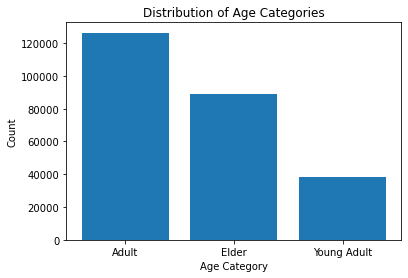

In [11]:
category_counts = HD_data["Age_category"].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories')
plt.show()

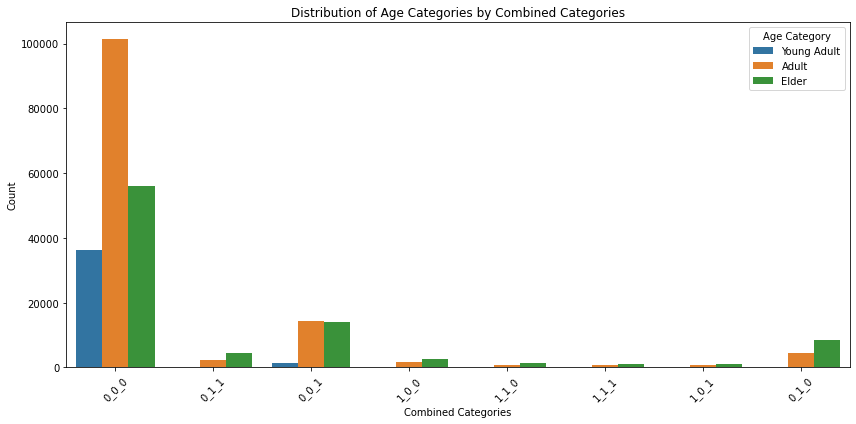

In [12]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='Age_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Age Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Age Category')
plt.tight_layout() 
plt.show()

In [13]:
max(HD_data["Income"])
#min(HD_data["Income"])


"""
Divide into 3 groups

Low Income: 1 - 3
Mid Income: 4 - 6
High Income: 7 - 8 

"""


bins = [1, 4, 7, float('inf')]  
labels = ['Low Income', 'Mid Income', 'High Income']  


HD_data['Income_category'] = pd.cut(HD_data['Income'], bins=bins, labels=labels, right=False)

print(HD_data['Income_category'])



0          Low Income
1          Low Income
2         High Income
3          Mid Income
4          Mid Income
             ...     
253675    High Income
253676     Mid Income
253677     Low Income
253678     Low Income
253679     Low Income
Name: Income_category, Length: 253680, dtype: category
Categories (3, object): ['Low Income' < 'Mid Income' < 'High Income']


In [14]:
#print(HD_data["Income"])

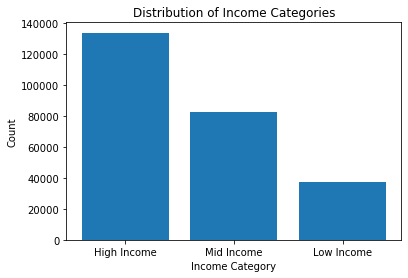

In [15]:
# Maybe redo this group!

category_counts = HD_data["Income_category"].value_counts()


'''
plt.bar(range(len(category_counts)), category_counts.values)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Distribution of Income Categories')

plt.xticks(range(len(labels)), labels)

plt.show()

'''

#category_counts = HD_data["Age_category"].value_counts()

# Plot the distribution of BMI categories
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Distribution of Income Categories')
plt.show()

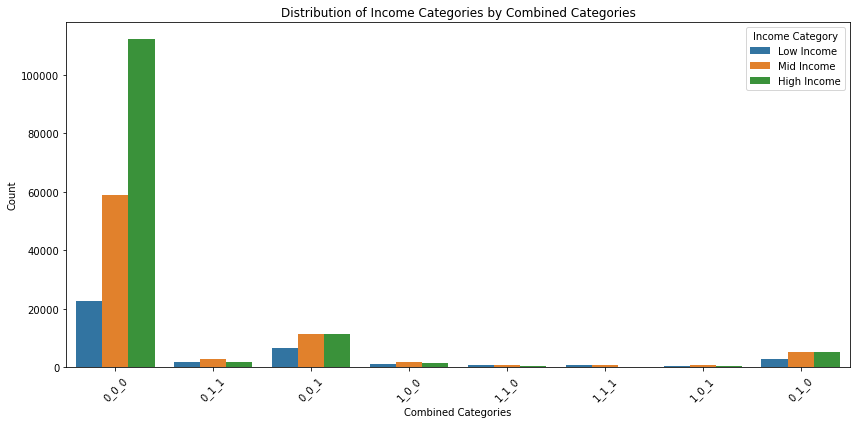

In [16]:
# This iS VERY INTERESTING!! Mostly all of the high income have nothing wrong with them>>>>>>!

plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='Income_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Income Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Income Category')
plt.tight_layout() 
plt.show()

In [17]:
max(HD_data["PhysHlth"])
min(HD_data["PhysHlth"])


"""
Low PhysHlth: 0-10
Mid PhysHlth: 11 - 20 
High PhysHlth: 21 - 30 

"""
bins = [0, 10, 20, float('inf')]  
labels = ['Low PhysHlth', 'Mid PhysHlth', 'High PhysHlth']


HD_data["PhysHlth_category"] = pd.cut(HD_data['PhysHlth'], bins=bins, labels=labels, right=False)

print(HD_data['PhysHlth_category'])

0          Mid PhysHlth
1          Low PhysHlth
2         High PhysHlth
3          Low PhysHlth
4          Low PhysHlth
              ...      
253675     Low PhysHlth
253676     Low PhysHlth
253677     Low PhysHlth
253678     Low PhysHlth
253679     Low PhysHlth
Name: PhysHlth_category, Length: 253680, dtype: category
Categories (3, object): ['Low PhysHlth' < 'Mid PhysHlth' < 'High PhysHlth']


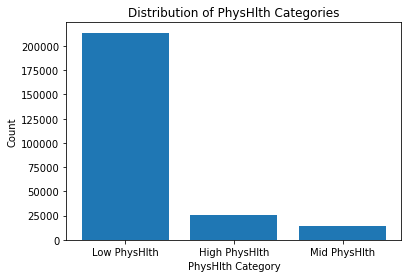

In [18]:
category_counts = HD_data["PhysHlth_category"].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('PhysHlth Category')
plt.ylabel('Count')
plt.title('Distribution of PhysHlth Categories')
plt.show()

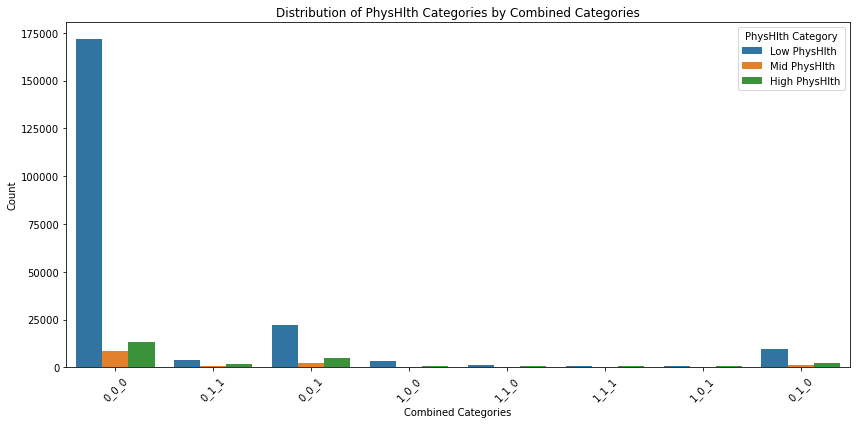

In [19]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='PhysHlth_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of PhysHlth Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='PhysHlth Category')
plt.tight_layout() 
plt.show()

In [20]:
"""
Low Education: 1 - 2
Mid Education: 3 - 4
High Education: 5 - 6 

"""


bins = [1, 3, 5, float('inf')]  
labels = ['Low Education', 'Mid Education', 'High Education']


HD_data["Education_category"] = pd.cut(HD_data['Education'], bins=bins, labels=labels, right=False)

print(HD_data['Education_category'])

0          Mid Education
1         High Education
2          Mid Education
3          Mid Education
4         High Education
               ...      
253675    High Education
253676     Low Education
253677    High Education
253678    High Education
253679    High Education
Name: Education_category, Length: 253680, dtype: category
Categories (3, object): ['Low Education' < 'Mid Education' < 'High Education']


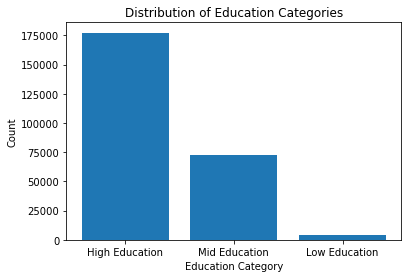

In [21]:
category_counts = HD_data["Education_category"].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Education Category')
plt.ylabel('Count')
plt.title('Distribution of Education Categories')
plt.show()

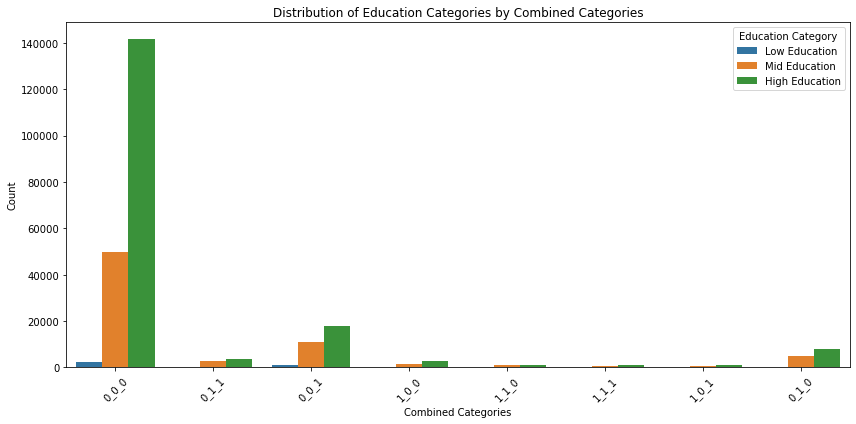

In [22]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='Education_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Education Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Education Category')
plt.tight_layout() 
plt.show()

In [23]:
def create_contingency_table(df, category):
    contingency_table = df.groupby('Combined')[category].value_counts().unstack().fillna(0)
    total = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total, axis=0) * 100).add_prefix(f"{category}_%_")
    percentages = percentages.round(2)
    percentages = percentages.astype(str) + "%"
    return pd.concat([contingency_table, percentages, total.rename('Total')], axis=1)

# Generate all contingency tables
categories = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', "BMI_category", "MentHlth_category", "Age_category","Income_category", "PhysHlth_category", "Education_category" ]
tables = {cat: create_contingency_table(HD_data, cat) for cat in categories}



category_dropdown = widgets.Dropdown(
    options=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
             'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', "BMI_category", "MentHlth_category", "Age_category", "Income_category", "PhysHlth_category", "Education_category"],
    description='Select Variable:',
    disabled=False
)

# Define function to update output
def update_output(category):
    table = create_contingency_table(HD_data, category)
    display(table)

# Create an interactive widget and display the dropdown
widgets.interactive(update_output, category=category_dropdown)

interactive(children=(Dropdown(description='Select Variable:', options=('HighBP', 'HighChol', 'CholCheck', 'Sm…

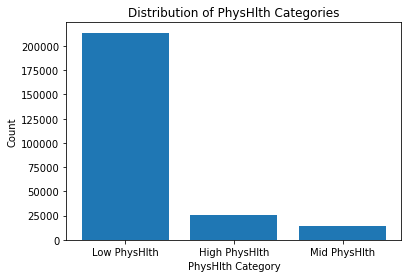

In [24]:
category_counts = HD_data["PhysHlth_category"].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('PhysHlth Category')
plt.ylabel('Count')
plt.title('Distribution of PhysHlth Categories')
plt.show()

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Dropdown

# Define a function that creates the plot based on the selected variable
def plot_data(column):
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    sns.countplot(x='Combined', hue=column, data=HD_data, palette='viridis')
    plt.title(f'Distribution of {column} by Combined Categories')
    plt.xlabel('Combined Category')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend(title=column, loc='upper right')
    plt.show()

# Create a dropdown and link it to the plot function
columns_to_plot = [col for col in HD_data.columns if col != 'Combined']
dropdown = Dropdown(options=columns_to_plot, description='Select Variable:')
interact(plot_data, column=dropdown)




interactive(children=(Dropdown(description='Select Variable:', options=('HeartDiseaseorAttack', 'HighBP', 'Hig…

<function __main__.plot_data(column)>

In [26]:
HD_data_filter = HD_data[HD_data["Combined"] != "0_0_0"]

#print(HD_data_filter["Combined"])

In [27]:

# Define a function that creates the plot based on the selected variable
def plot_data(column):
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    sns.countplot(x='Combined', hue=column, data=HD_data_filter, palette='viridis')
    plt.title(f'Distribution of {column} by Combined Categories')
    plt.xlabel('Combined Category')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend(title=column, loc='upper right')
    plt.show()

# Create a dropdown and link it to the plot function
columns_to_plot = [col for col in HD_data_filter.columns if col != 'Combined']
dropdown = Dropdown(options=columns_to_plot, description='Select Variable:')
interact(plot_data, column=dropdown)

interactive(children=(Dropdown(description='Select Variable:', options=('HeartDiseaseorAttack', 'HighBP', 'Hig…

<function __main__.plot_data(column)>

Combined          0_0_0      0_0_1     0_1_0     0_1_1     1_0_0     1_0_1  \
Age_category                                                                 
Young Adult   94.882857   3.540425  0.739985  0.130739  0.460203  0.065370   
Adult         80.307994  11.308422  3.486697  1.875504  1.391988  0.582435   
Elder         62.898844  15.712361  9.500393  4.923094  2.945998  1.162007   

Combined         1_1_0     1_1_1  
Age_category                      
Young Adult   0.133354  0.047066  
Adult         0.551572  0.495386  
Elder         1.630179  1.227125  


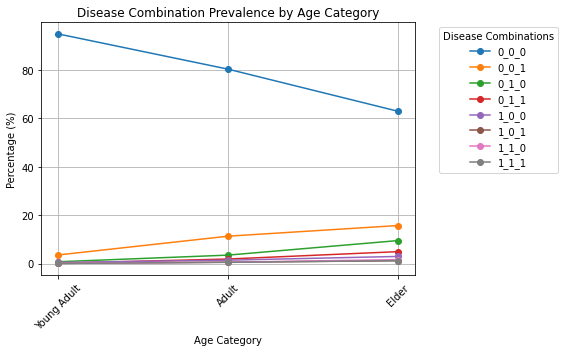

In [31]:

disease_counts = HD_data.groupby(['Age_category', 'Combined']).size().unstack(fill_value=0)

#Calculate percentages within each age category
disease_percentages = disease_counts.div(disease_counts.sum(axis=1), axis=0) * 100

#Check the transformed data
print(disease_percentages.head())
#Plotting
plt.figure(figsize=(8, 5))

#Plot a line for each disease combination
for column in disease_percentages.columns:
    plt.plot(disease_percentages.index, disease_percentages[column], marker='o', label=str(column))

plt.title('Disease Combination Prevalence by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage (%)')
plt.legend(title='Disease Combinations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()